# BEE 4750 DC Transportation Optimization

#### Group Members: Maya Zamor, MacKenzie Fountain, Noah Hartman, Raashid Husain

Our project will minimize an objective function that calculates the net carbon dioxide emissions produced by tailpipe emissions from various sources of transportation; internal combustion engines (ICEs), electric vehicles (EVs), and buses. The scope of this project aims to include the CO2 emissions from one city. During our preliminary meeting, our team discussed using Ithaca as a model. Decision variables include the number of electric vehicles, gas vehicles, and buses. Constraints include the city’s capacity of gas vehicles and buses, the city’s EV infrastructure capacity, and any emissions standards/thresholds set by the EPA and/or NYSDEC. We chose this topic since we were interested in the cross-section of transportation and air pollution as the shift to electric vehicles expands.


In [ ]:
import Pkg
Pkg.activate(@__DIR__)
Pkg.instantiate()

In [ ]:
import Pkg; Pkg.add("JuMP")
import Pkg; Pkg.add("HiGHS")
import Pkg; Pkg.add("DataFrames")
import Pkg; Pkg.add("GraphRecipes")
import Pkg; Pkg.add("Plots")
import Pkg; Pkg.add("Measures")
import Pkg; Pkg.add("MarkdownTables")

In [4]:
using JuMP
using HiGHS
using DataFrames
using GraphRecipes
using Plots
using Measures
using MarkdownTables




#### Average Distance Traveled per Mode of Transportation

|   Transportation   | Distance (miles) |
|:--------:|:---------------|
|    Gas   |       1      |
| Electric |       2     |
|    Bus   |       3     |
|   Train  |       4     |

.

|   Transportation   | CO2 emissions (lb/yr) | CO2 per Mile (g/mile)| 
|:--------:|:--------------------------:|:---------------------:|
|    Gas   |            350             |         0.xx          |
| Electric |            280             |         0.xx          |
|    Bus   |            390             |         0.xx          |
|   Train  |            390             |         0.xx          |

.

|   Transportation   | Cost ($/year) |
|:--------:|:---------------|
|    Gas   |       1      |
| Electric |       2     |
|    Bus   |       3     |
|   Train  |       4     |

In [245]:
Transportation = ["Gas", "Electric", "Bus", "Train"]

commuters=42256
#population of DC residents who are over 18 years old in nearby neighborhoods

max_EV=8066
max_cars=commuters*0.692*0.643

#max_budget= commuters*5
#budget units $* vechiles

18802.060736

In [281]:
m = Model(HiGHS.Optimizer)

# Variables
@variable(m, G >= 0)  # Gas cars
@variable(m, E >= 0)  # Electric vehicles
@variable(m, B >= 0)  # Bus riders
@variable(m, T >= 0)  # Train riders

# Objective: Minimize CO2 emissions per mile
@objective(m, Min, 400 * G + 125 * E + 168.75 * B + 117 * T)

# Constraints
pop_demand=@constraint(m, G + E + B + T >= commuters)            # Population demand
cars=@constraint(m, E <= max_cars*0.25) 
EVs=@constraint(m, G+E == max_cars)    # Max cars constraint

bus_capacity=@constraint(m, (B <= 1280))
#people capacity of bus
train_capacity=@constraint(m, (T <= 46080))
#people capacity of trains

e=@constraint(m, (G + E) + (B * 0.40) + (T * 0.50) >= commuters) # Efficiency constraint
#@constraint(m, ((0.17 * 13.1) * G + (0.05 * 13.1) * E + (11.24 * 0.2) * B + (10.02 * 0.474) * T <= max_budget ))  # budget



G + E + 0.4 B + 0.5 T ≥ 42256

In [282]:
optimize!(m)
print("
The Objective Value = ", objective_value(m))


Running HiGHS 1.8.1 (git hash: 4a7f24ac6): Copyright (c) 2024 HiGHS under MIT licence terms
Coefficient ranges:
  Matrix [4e-01, 1e+00]
  Cost   [1e+02, 4e+02]
  Bound  [0e+00, 0e+00]
  RHS    [1e+03, 5e+04]
Presolving model
2 rows, 2 cols, 4 nonzeros  0s
0 rows, 0 cols, 0 nonzeros  0s
Presolve : Reductions: rows 0(-6); columns 0(-4); elements 0(-13) - Reduced to empty
Solving the original LP from the solution after postsolve
Model status        : Optimal
Objective value     :  1.1794173246e+07
Relative P-D gap    :  0.0000000000e+00
HiGHS run time      :          0.00

The Objective Value = 1.17941732458e7

Gas Cars: 14101.545552
Electric Vehicles: 4700.515184
Bus Riders: 1034.8481599999923
Train Riders: 46080.0


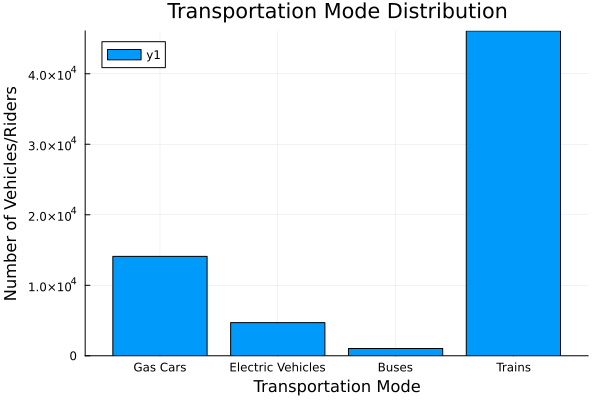

In [283]:
# Extract results
gas_cars = value(G)
electric_vehicles = value(E)
bus_riders = value(B)
train_riders = value(T)

# Display the results
println("Gas Cars: ", gas_cars)
println("Electric Vehicles: ", electric_vehicles)
println("Bus Riders: ", bus_riders)
println("Train Riders: ", train_riders)

# Create a bar chart of the results
categories = ["Gas Cars", "Electric Vehicles", "Buses", "Trains"]
values = [gas_cars, electric_vehicles, bus_riders, train_riders]

# Create the bar plot
bar(categories, values, title="Transportation Mode Distribution", ylabel="Number of Vehicles/Riders", xlabel="Transportation Mode")


In [284]:
@show shadow_price(pop_demand);
@show shadow_price(cars);
@show shadow_price(EVs);
@show shadow_price(bus_capacity);
@show shadow_price(train_capacity);
@show shadow_price(e);

shadow_price(pop_demand) = -0.0
shadow_price(cars) = -275.0
shadow_price(EVs) = -21.875
shadow_price(bus_capacity) = 0.0
shadow_price(train_capacity) = -93.9375
shadow_price(e) = -421.875
